<a href="https://colab.research.google.com/github/kywch/diffusion-ui/blob/colab-backend/diffusionui_with_colab_backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use [Diffusion UI](https://diffusionui.com) with the [AUTOMATIC1111 stable-diffusion-webui](https://github.com/AUTOMATIC1111/stable-diffusion-webui) on Colab

Modifiled [the Colab notebook maintained by Akaibu](https://colab.research.google.com/drive/1kw3egmSn-KgWsikYvOMjJkVDsPLjEMzl) from the [AUTOMATIC1111 stable-diffusion-webui](https://github.com/AUTOMATIC1111/stable-diffusion-webui) repo.


In [ ]:
import os
os.kill(os.getpid(), 9) # This will crash Colab (required, everything will still be intact so dont worry)

In [ ]:
#@title Clone webui repository

!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui

Cloning into 'stable-diffusion-webui'...
remote: Enumerating objects: 4335, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 4335 (delta 107), reused 115 (delta 73), pack-reused 4164
Receiving objects: 100% (4335/4335), 20.30 MiB | 43.04 MiB/s, done.
Resolving deltas: 100% (3029/3029), done.


In [ ]:
#@title Stable Diffusion V1.4 model (normal)

# get a token from https://huggingface.co/settings/tokens
#user_token = "" #@param {type:"string"}
#user_header = f"\"Authorization: Bearer {user_token}\""
#!wget --header={user_header} https://huggingface.co/CompVis/stable-diffusion-v-1-4-original/resolve/main/sd-v1-4.ckpt -O /content/stable-diffusion-webui/model.ckpt

! wget -O /content/stable-diffusion-webui/model.ckpt "https://www.googleapis.com/storage/v1/b/aai-blog-files/o/sd-v1-4.ckpt?alt=media"

--2022-10-04 23:46:19--  https://www.googleapis.com/storage/v1/b/aai-blog-files/o/sd-v1-4.ckpt?alt=media
Resolving www.googleapis.com (www.googleapis.com)... 108.177.13.95, 74.125.26.95, 172.217.193.95, ...
Connecting to www.googleapis.com (www.googleapis.com)|108.177.13.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4265380512 (4.0G) [application/octet-stream]
Saving to: ‘/content/stable-diffusion-webui/model.ckpt’

/content/stable-dif 100%[===================>]   3.97G   245MB/s    in 17s     

2022-10-04 23:46:36 (244 MB/s) - ‘/content/stable-diffusion-webui/model.ckpt’ saved [4265380512/4265380512]



In [ ]:
#@title Install required libraries using launch.py
# https://github.com/AUTOMATIC1111/stable-diffusion-webui/wiki/Install-and-Run-on-NVidia-GPUs#almost-automatic-installation-and-launch

%cd stable-diffusion-webui
%time ! COMMANDLINE_ARGS="--exit" REQS_FILE="requirements.txt" python launch.py

/content/stable-diffusion-webui
Python 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Commit hash: ef40e4cd4d383a3405e03f1da3f5b5a1820a8f53
Installing gfpgan
Installing clip
Cloning Stable Diffusion into repositories/stable-diffusion...
Cloning Taming Transformers into repositories/taming-transformers...
Cloning K-diffusion into repositories/k-diffusion...
Cloning CodeFormer into repositories/CodeFormer...
Cloning BLIP into repositories/BLIP...
Installing requirements for CodeFormer
Installing requirements for Web UI
Exiting because of --exit argument
CPU times: user 481 ms, sys: 73.8 ms, total: 554 ms
Wall time: 1min 22s


## Launch web ui. You will get a link to nnn.gradio.app, follow it.

Commandline arguments are:
  - `--share` - create online gradio.app link
  - `--gradio-debug` - print outputs to console
  - `--gradio-auth me:qwerty` - add authentication to gradio: username me, password qwerty

In [ ]:
#! COMMANDLINE_ARGS="--share --gradio-debug" REQS_FILE="requirements.txt" python launch.py
! COMMANDLINE_ARGS="--share --allow-code --disable-console-progressbars --enable-console-prompts" REQS_FILE="requirements.txt" python launch.py

Python 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Commit hash: ef40e4cd4d383a3405e03f1da3f5b5a1820a8f53
Installing requirements for Web UI
Launching Web UI with arguments: --share --allow-code --disable-console-progressbars --enable-console-prompts
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Downloading: 100% 939k/939k [00:00<00:00, 7.47MB/s]
Downloading: 100% 512k/512k [00:00<00:00, 6.55MB/s]
Downloading: 100% 389/389 [00:00<00:00, 463kB/s]
Downloading: 100% 905/905 [00:00<00:00, 1.24MB/s]
Downloading: 100% 4.41k/4.41k [00:00<00:00, 5.20MB/s]
Downloading: 100% 1.59G/1.59G [00:23<00:00, 71.9MB/s]
Loading weights [7460a6fa] from /content/stable-diffusion-webui/model.ckpt
Global Step: 470000
Model loaded.
Loaded a total of 0 textual inversion embeddings.
Running on loca

## You can now use https://diffusionui.com/ with this colab backend by putting the public gradio link like below

* select `Automatic1111` in the dropdown at the top of the left panel
* click on the ⓘ icon to go to the model info tab
* click the grey box besides the `API url` 
* enter the public gradio link in the text box and click the `Modify API URL` button

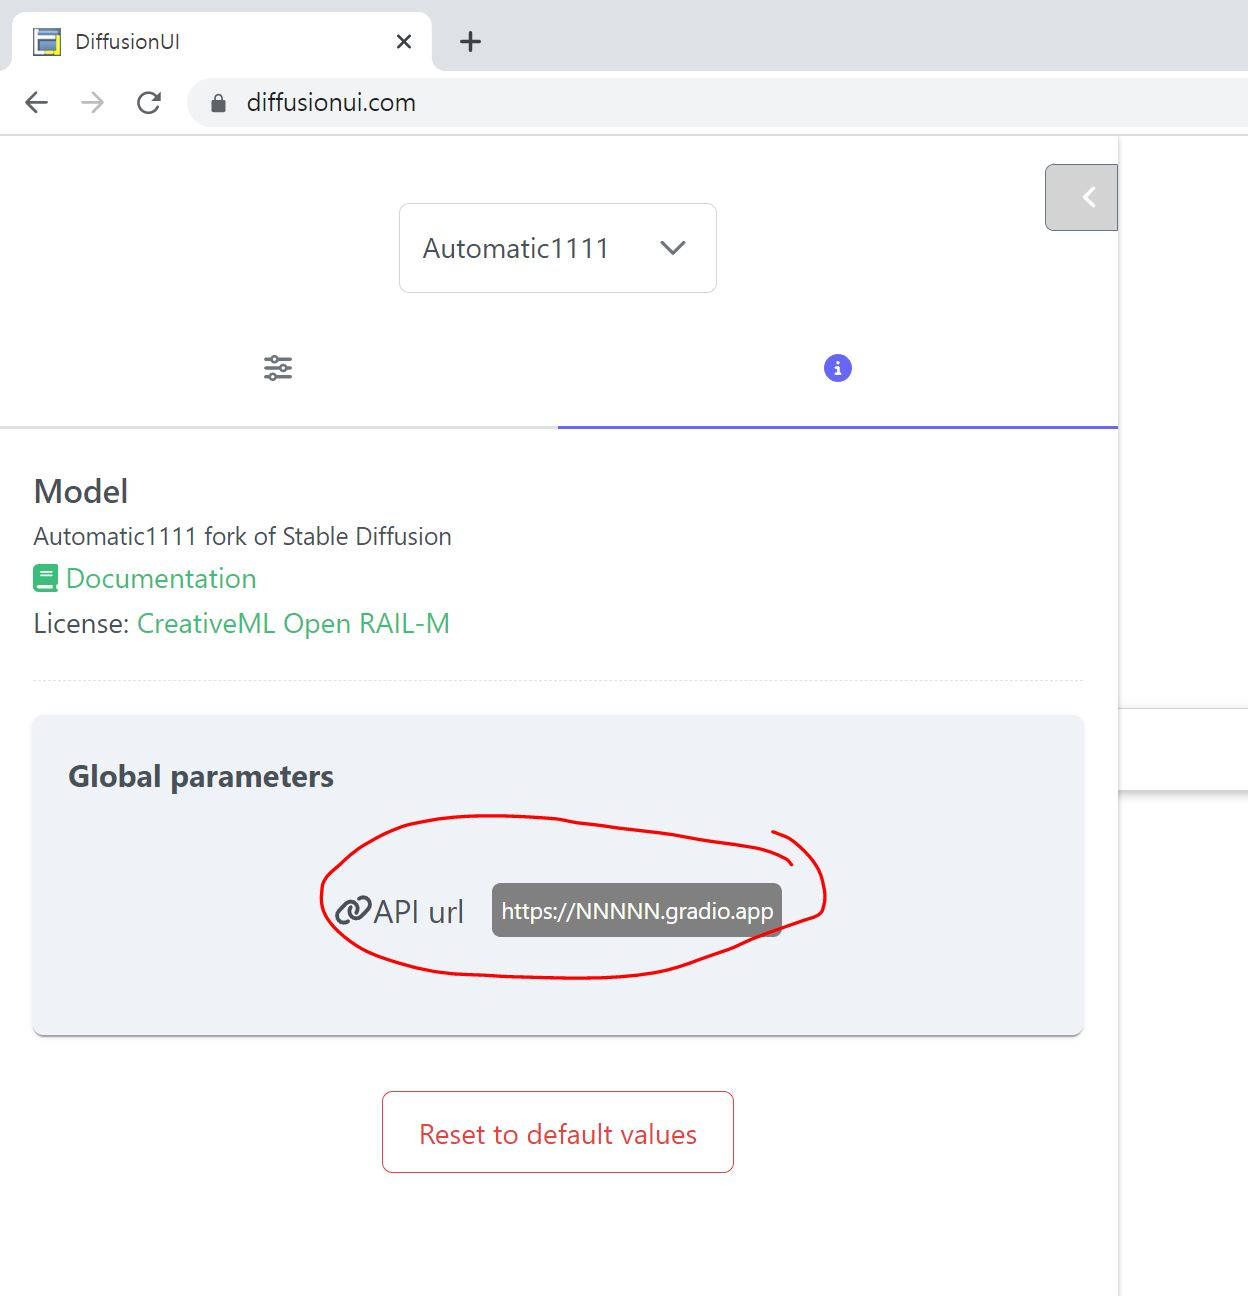

commands for ***after*** you have gotten done with a session
============================================================================

Zip images for downloading on local drive (click the folder icon on the left, the one below {x})

In [ ]:
!zip -r /content/stable-diffusion-webui /content/stable-diffusion-webui/outputs 

Save images to Google Drive **Warning: this will cause google to scan your drive, so if you intend to use this and worry about that kind of stuff, probablly just set this up on a clean account that's just for this colab**

In [ ]:
from google.colab import drive # type: ignore

try:
   drive_path = "/content/drive"
   drive.mount(drive_path,force_remount=False)
except:
   print("...error mounting drive or with drive path variables")

!cp -r "/content/stable-diffusion-webui/outputs" "/content/drive/MyDrive"